In [1]:
import pandas as pd    #import several important packages which give us some useful features
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pickle #library for saving our model

In [2]:
clevelandData = pd.read_csv('processed.cleveland.csv') #loading data
clevelandData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
clevelandData.drop(columns = ['trestbps', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ], inplace=True, errors= 'ignore')
clevelandData

,age,sex,cp,chol,restecg,num
0,63,1,1,233,2,0
1,67,1,4,286,2,2
2,67,1,4,229,2,1
3,37,1,3,250,0,0
4,41,0,2,204,2,0
...,...,...,...,...,...,...
298,45,1,1,264,0,1
299,68,1,4,193,0,2
300,57,1,4,131,0,3
301,57,0,2,236,2,1


In [4]:
clevelandData.columns = ['Age', 'Sex', 'CP', 'Chol', 'ECG', 'class']
clevelandData

,Age,Sex,CP,Chol,ECG,class
0,63,1,1,233,2,0
1,67,1,4,286,2,2
2,67,1,4,229,2,1
3,37,1,3,250,0,0
4,41,0,2,204,2,0
...,...,...,...,...,...,...
298,45,1,1,264,0,1
299,68,1,4,193,0,2
300,57,1,4,131,0,3
301,57,0,2,236,2,1


In [5]:
clevelandData["Class"] = clevelandData["class"]
clevelandData

,Age,Sex,CP,Chol,ECG,class,Class
0,63,1,1,233,2,0,0
1,67,1,4,286,2,2,2
2,67,1,4,229,2,1,1
3,37,1,3,250,0,0,0
4,41,0,2,204,2,0,0
...,...,...,...,...,...,...,...
298,45,1,1,264,0,1,1
299,68,1,4,193,0,2,2
300,57,1,4,131,0,3,3
301,57,0,2,236,2,1,1


In [6]:
clevelandData['Class'] = ['0' if x==0 else '1' for x in clevelandData['class']]
clevelandData

,Age,Sex,CP,Chol,ECG,class,Class
0,63,1,1,233,2,0,0
1,67,1,4,286,2,2,1
2,67,1,4,229,2,1,1
3,37,1,3,250,0,0,0
4,41,0,2,204,2,0,0
...,...,...,...,...,...,...,...
298,45,1,1,264,0,1,1
299,68,1,4,193,0,2,1
300,57,1,4,131,0,3,1
301,57,0,2,236,2,1,1


In [7]:
clevelandData.drop(columns = ['class'], inplace = True, errors = 'ignore')
clevelandData

,Age,Sex,CP,Chol,ECG,Class
0,63,1,1,233,2,0
1,67,1,4,286,2,1
2,67,1,4,229,2,1
3,37,1,3,250,0,0
4,41,0,2,204,2,0
...,...,...,...,...,...,...
298,45,1,1,264,0,1
299,68,1,4,193,0,1
300,57,1,4,131,0,1
301,57,0,2,236,2,1


In [8]:
clevelandData.isnull().sum() #compute sum of missing values per column

Age      0
Sex      0
CP       0
Chol     0
ECG      0
Class    0
dtype: int64

In [9]:
#Normalisation
x = clevelandData.values

In [10]:
print (x)

[[63 1 1 233 2 '0']
 [67 1 4 286 2 '1']
 [67 1 4 229 2 '1']
 ...
 [57 1 4 131 0 '1']
 [57 0 2 236 2 '1']
 [38 1 3 175 0 '0']]


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
clevelandData = clevelandData.copy()
clevelandDatanorm = pd.DataFrame(x_scaled, columns=clevelandData.columns)

In [12]:
clevelandDatanorm.head(len(clevelandDatanorm))

,Age,Sex,CP,Chol,ECG,Class
0,0.708333,1.0,0.000000,0.244292,1.0,0.0
1,0.791667,1.0,1.000000,0.365297,1.0,1.0
2,0.791667,1.0,1.000000,0.235160,1.0,1.0
3,0.166667,1.0,0.666667,0.283105,0.0,0.0
4,0.250000,0.0,0.333333,0.178082,1.0,0.0
...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.315068,0.0,1.0
299,0.812500,1.0,1.000000,0.152968,0.0,1.0
300,0.583333,1.0,1.000000,0.011416,0.0,1.0
301,0.583333,0.0,0.333333,0.251142,1.0,1.0


In [13]:
X = clevelandDatanorm.drop('Class', axis=1)
y = clevelandDatanorm['Class']

In [14]:
X

,Age,Sex,CP,Chol,ECG
0,0.708333,1.0,0.000000,0.244292,1.0
1,0.791667,1.0,1.000000,0.365297,1.0
2,0.791667,1.0,1.000000,0.235160,1.0
3,0.166667,1.0,0.666667,0.283105,0.0
4,0.250000,0.0,0.333333,0.178082,1.0
...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.315068,0.0
299,0.812500,1.0,1.000000,0.152968,0.0
300,0.583333,1.0,1.000000,0.011416,0.0
301,0.583333,0.0,0.333333,0.251142,1.0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5, criterion='entropy')
clf = clf.fit(X_train, y_train)

[Text(182.466, 199.32, 'X[2] <= 0.833\nentropy = 0.992\nsamples = 212\nvalue = [117, 95]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 0.573\nentropy = 0.75\nsamples = 112\nvalue = [88, 24]'),
 Text(40.176, 126.83999999999999, 'X[4] <= 0.5\nentropy = 0.426\nsamples = 69\nvalue = [63, 6]'),
 Text(26.784000000000002, 90.6, 'X[1] <= 0.5\nentropy = 0.583\nsamples = 43\nvalue = [37, 6]'),
 Text(13.392000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(40.176, 54.359999999999985, 'X[0] <= 0.448\nentropy = 0.709\nsamples = 31\nvalue = [25, 6]'),
 Text(26.784000000000002, 18.119999999999976, 'entropy = 0.845\nsamples = 22\nvalue = [16, 6]'),
 Text(53.568000000000005, 18.119999999999976, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(53.568000000000005, 90.6, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(127.22400000000002, 126.83999999999999, 'X[1] <= 0.5\nentropy = 0.981\nsamples = 43\nvalue = [25, 18]'),
 Text(80.352, 90.6, 'X[0] <= 0.594\nen

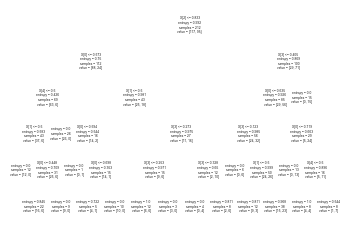

In [18]:
tree.plot_tree(clf.fit(X_train, y_train)) 

In [19]:
ypred = clf.predict(X_test)
ypred

array([0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0.])

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        47
         1.0       0.82      0.75      0.79        44

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



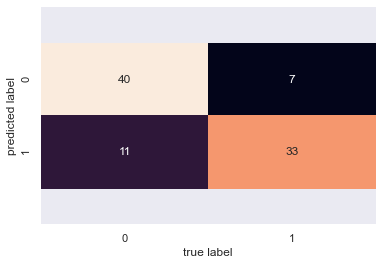

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, y_test)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [22]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',
                        random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)

In [23]:
ypredbag = forest.predict(X_test)

In [24]:
print(metrics.classification_report(y_test, ypredbag))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        47
         1.0       0.77      0.77      0.77        44

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



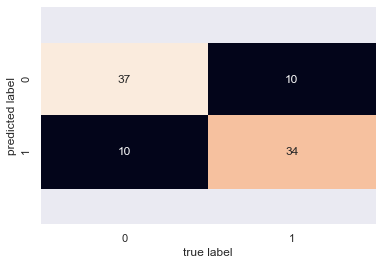

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypredbag)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#svm = SVC(kernel='poly', gamma='auto')
#svm = SVC(kernel='rbf', gamma='auto')

svm.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
ypredsvm = svm.predict(X_test)

In [28]:
print(metrics.classification_report(y_test, ypredsvm))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        47
         1.0       0.82      0.84      0.83        44

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



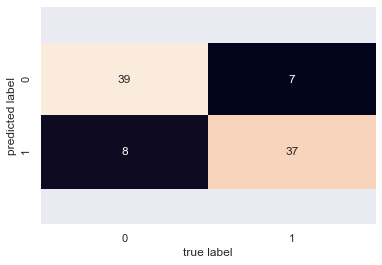

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypredsvm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [30]:
#Without Old peak and slope
#Linear > accuracy: 0.84 , miscalculations = 15 (7 false neg)
#Poly > accuracy: 0.84 , miscalculations = 15 (12 false neg)
#RBF > accuracy: 0.78 , miscalculations = 20 (12 false neg)

#With Old peak and slope
#Linear > accuracy: 0.77 , miscalculations = 21 (14 false neg)
#Poly > accuracy: 0.78 , miscalculations = 20 (19 false neg)
#RBF > accuracy: 0.77 , miscalculations = 21 (14 false neg)

In [33]:
#Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [35]:
#Save the x-data to disk
filename = 'unnormalized_data.sav'
pickle.dump(clevelandData, open(filename, 'wb'))